In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import randomcolor as rc


In [159]:
file_path ="C:\\Users\\sudhi\\OneDrive\\Desktop\\Python Visualizations Case Study\\"
file_name ="SalesData.csv"

In [160]:
salesdata = pd.read_csv(file_path + file_name)

#
Compared Sales by region for 2016 with 2015 using bar chart

In [161]:
q1=salesdata.groupby(by=['Region']).agg(Sales2015=('Sales2015',sum),Sales2016=('Sales2016',sum))

<Figure size 1000x600 with 0 Axes>

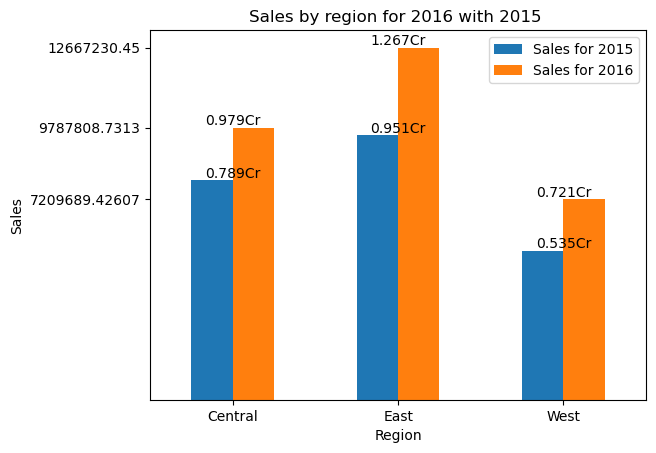

In [162]:
plt.figure(figsize=(10, 6))
q1.plot(kind='bar')
plt.xlabel("Region")
plt.title("Sales by region for 2016 with 2015 ")
plt.ylabel("Sales")
plt.legend(['Sales for 2015','Sales for 2016'])
plt.xticks(rotation=0)
for i, j in enumerate(q1.Sales2016):
    plt.text(i, j, f'{round(j/10000000, 3)}Cr', ha='center', va='bottom')
for i, j in enumerate(q1.Sales2015):
    plt.text(i, j, f'{round(j/10000000, 3)}Cr', ha='center', va='bottom') 
y_values = q1.Sales2016.tolist()
plt.yticks(y_values, [str(value) for value in y_values])    
plt.show()

#
 the contributing factors to the sales for each region in 2016. 

In [163]:
q2=salesdata.groupby(by=['Region']).agg(Sales2016=('Sales2016',sum))

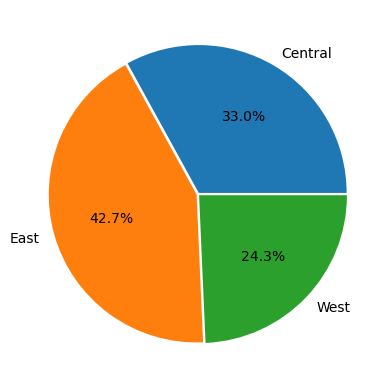

In [175]:
plt.pie(q2['Sales2016'],labels=q2.index,autopct='%1.1f%%',explode=(0.01, 0.01,0.01))
plt.show()


#
 the total sales of 2015 and 2016 with respect to Region and Tiers

In [165]:
q=salesdata.groupby(by=['Region','Tier']).agg(Sales2015=('Sales2015',sum),Sales2016=('Sales2016',sum))

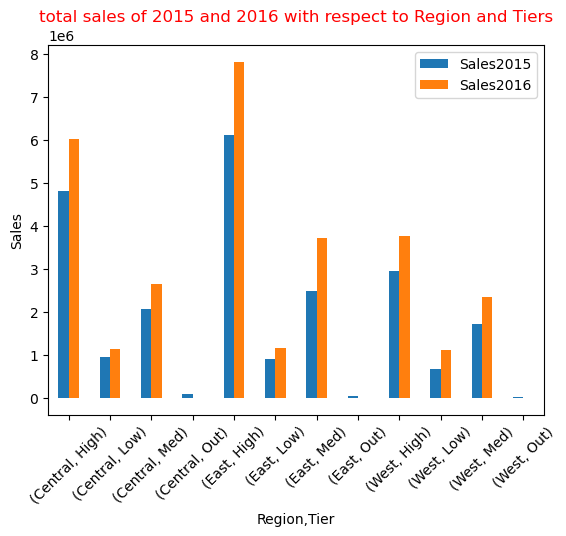

In [166]:
q.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("Sales")
plt.title("total sales of 2015 and 2016 with respect to Region and Tiers",c='r')
plt.show()

## 
In East region, the state registered a decline in 2016 as compared to 2015

In [167]:
q4=salesdata.loc[salesdata['Region']=='East']

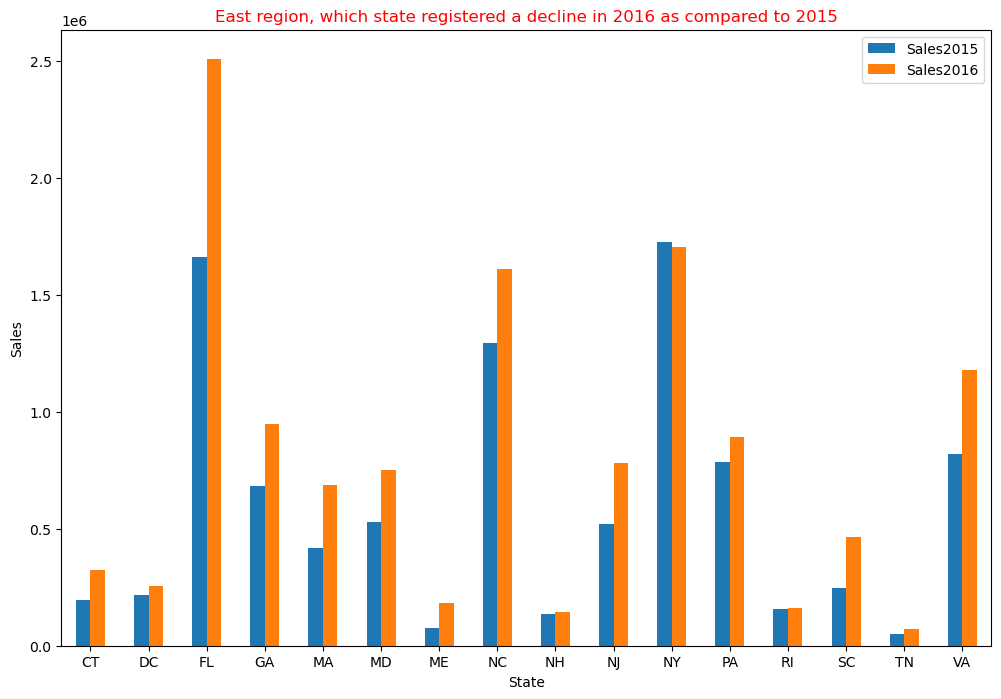

In [168]:

q4.groupby(by=['State']).agg(Sales2015=('Sales2015',sum),Sales2016=('Sales2016',sum)).plot(kind='bar',figsize=(12,8))
plt.xticks(rotation=0)
plt.ylabel("Sales")
plt.title("East region, which state registered a decline in 2016 as compared to 2015",c='r')
plt.legend()
ax.grid(axis='y')
plt.show()

In [169]:
# NY registered a decline in 2016 as compared to 2015

## 
In all the High tier,the Division which saw a decline in number of units sold in 2016 compared to 2015

In [170]:
q5=salesdata.loc[salesdata['Tier']=='High']

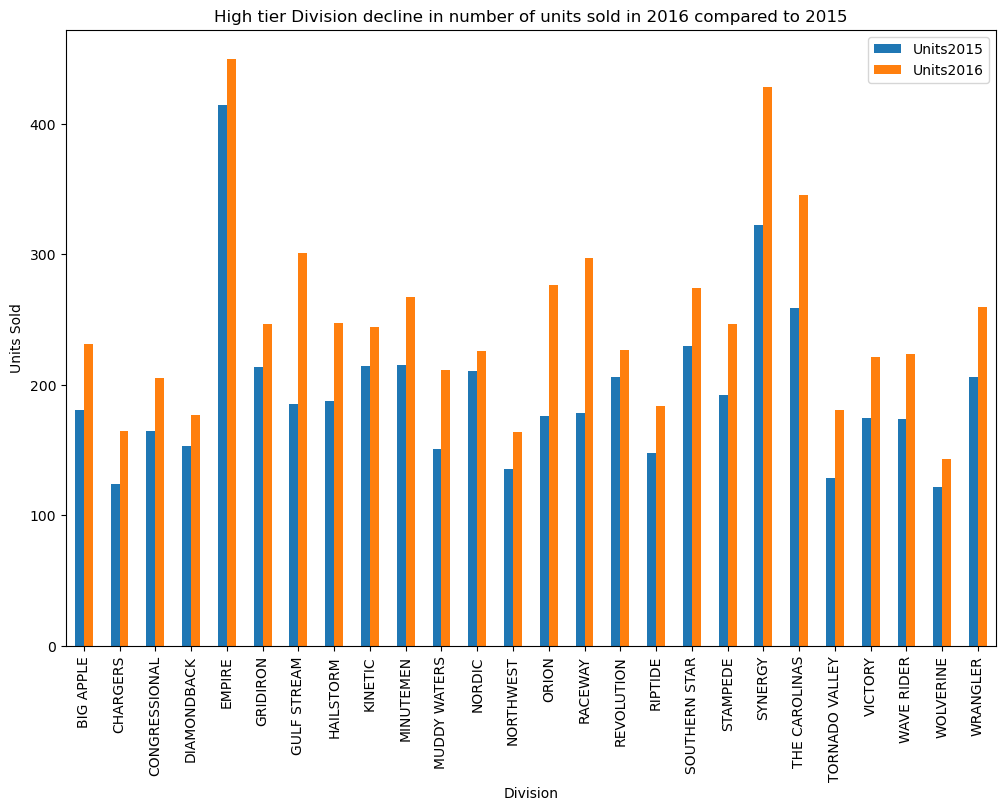

In [171]:
q5.groupby(by=['Division']).agg(Units2015=('Units2015',sum),Units2016=('Units2016',sum)).plot(kind='bar',figsize=(12,8))
plt.ylabel("Units Sold")
plt.title("High tier Division decline in number of units sold in 2016 compared to 2015")
plt.show()

## 
Created a new column suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4

In [172]:
salesdata['Qtr']=0
for i in range(len(salesdata)):
    if (salesdata['Month'][i] in ['Apr','May','Jun']):
        salesdata['Qtr'][i]='Q1'
    elif (salesdata['Month'][i] in ['Jul','Aug','Sept']):
        salesdata['Qtr'][i]='Q2'
    elif (salesdata['Month'][i] in ['Oct','Nov','Dec']):
        salesdata['Qtr'][i]='Q3'
    else:
        salesdata['Qtr'][i]='Q4'

C:\Users\sudhi\AppData\Local\Temp\ipykernel_13288\2824581601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesdata['Qtr'][i]='Q2'


## 
Compared Qtr wise sales in 2015 and 2016 in a bar plot

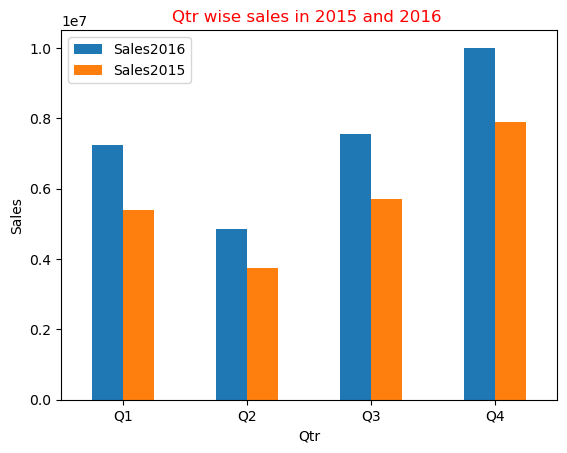

In [173]:
salesdata.groupby(by=['Qtr']).agg(Sales2016=('Sales2016',sum),Sales2015=('Sales2015',sum)).plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Sales")
plt.title("Qtr wise sales in 2015 and 2016 ",c='r')
plt.show()

## 
Determined the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart

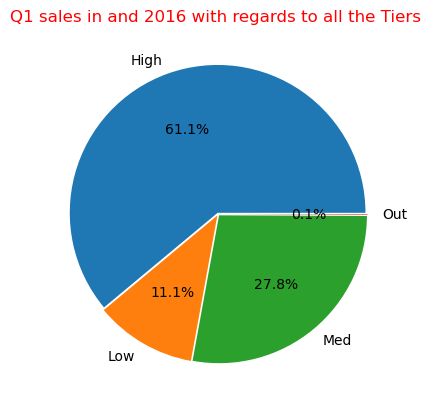

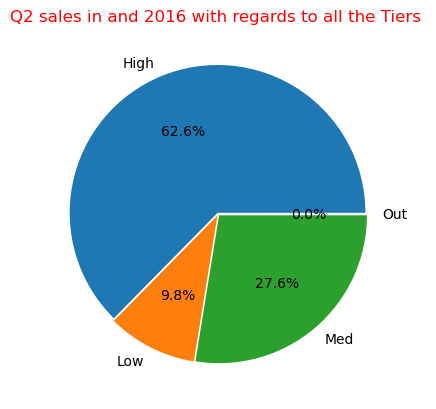

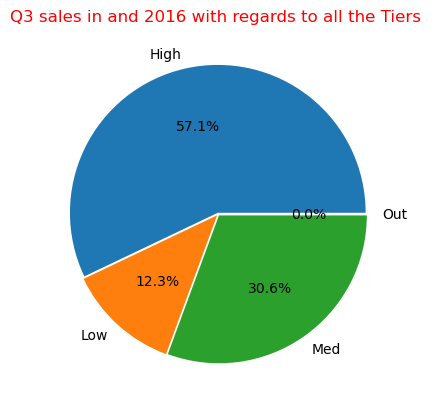

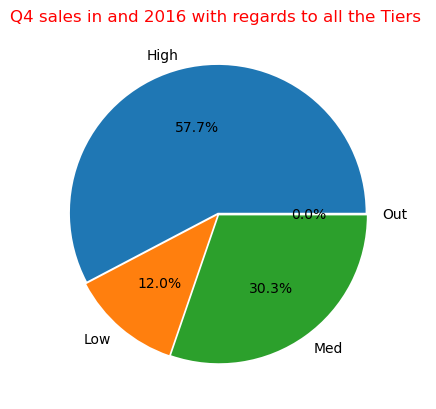

In [174]:
for i in range(len(salesdata['Qtr'].unique())):
    q8=salesdata.loc[(salesdata['Qtr']==salesdata['Qtr'].unique()[i])]
    q8=q8.groupby(by=['Tier']).agg(Sales2016=('Sales2016',sum))
    q8=q8.abs()
    q8=q8.reset_index()
    plt.figure()
    plt.pie(q8['Sales2016'],labels=q8.Tier,autopct='%1.1f%%',explode=(0.01,0.01,0.01,0.01))
    plt.title(f"Q{i+1} sales in and 2016 with regards to all the Tiers ",c='r')
plt.show()